# Project Titel - "Retail Sales Performance & Seasonality Analysis using Python"

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df= pd.read_csv(r'C:\Users\Abhinandan\Downloads\Retail and wherehouse Sale.csv')



In [3]:
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [4]:
# print (Data information)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              30000 non-null  int64  
 1   MONTH             30000 non-null  int64  
 2   SUPPLIER          29967 non-null  object 
 3   ITEM CODE         30000 non-null  object 
 4   ITEM DESCRIPTION  30000 non-null  object 
 5   ITEM TYPE         30000 non-null  object 
 6   RETAIL SALES      29999 non-null  float64
 7   RETAIL TRANSFERS  30000 non-null  float64
 8   WAREHOUSE SALES   30000 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.1+ MB


In [5]:
# print ( statistical value )
display(df.describe())

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,30000.0,30000.000000,29999.000000,30000.000000,30000.000000
mean,2020.0,3.911467,6.939796,6.594058,27.431031
std,0.0,2.836788,33.081054,27.879428,272.166085
min,2020.0,1.000000,-0.420000,-6.000000,-3999.000000
25%,2020.0,1.000000,0.000000,0.000000,0.000000
50%,2020.0,3.000000,0.160000,0.000000,1.000000
75%,2020.0,7.000000,2.920000,3.000000,6.000000
max,2020.0,9.000000,2739.000000,1507.000000,18317.000000


In [6]:
# print (missing values) 
print (df.isnull().sum())


YEAR                 0
MONTH                0
SUPPLIER            33
ITEM CODE            0
ITEM DESCRIPTION     0
ITEM TYPE            0
RETAIL SALES         1
RETAIL TRANSFERS     0
WAREHOUSE SALES      0
dtype: int64


In [7]:
#Removing the missing values 
df_clean =df. dropna()


In [8]:
# checking Missing values 
print (df_clean.isnull().sum())

YEAR                0
MONTH               0
SUPPLIER            0
ITEM CODE           0
ITEM DESCRIPTION    0
ITEM TYPE           0
RETAIL SALES        0
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
dtype: int64


In [9]:
# chacking (shape) how many rows are left
print ("\nNew total rows and coloums:",df_clean.shape)



New total rows and coloums: (29967, 9)


# PRODUCT PERFORMANCE ANALYSIS

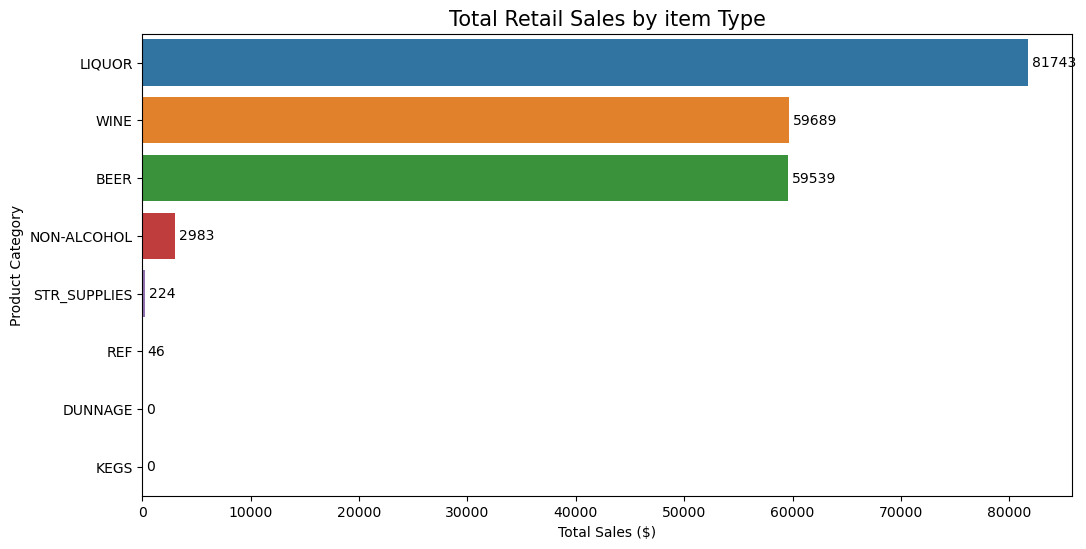

In [10]:
# BAR CHART

# GROUP BY ITEM TYPE AND SUM THE RETAIL SALES 
item_sales= df_clean.groupby('ITEM TYPE')['RETAIL SALES'].sum().sort_values(ascending=False).reset_index()

#CREATE THE BAR CHART 
plt.figure(figsize=(12,6))         # for seting the size of the chart 
bar_plot=sns.barplot(x='RETAIL SALES',y='ITEM TYPE',data=item_sales,hue="ITEM TYPE",legend=False)

# Adding Labels
plt.title('Total Retail Sales by item Type',fontsize=15)
plt.xlabel('Total Sales ($)',fontsize=10)
plt.ylabel('Product Category',fontsize=10)

# Adding the values for each bar
for container in bar_plot.containers:
    plt.bar_label(container, fmt='%.0f', padding=3)
plt.show()


# MONTHLY SALES TREND & SEASONALITY

In [11]:
# Gropping data by month to see total retail Sales 
monthly_sales=df_clean.groupby('MONTH')['RETAIL SALES'].sum().reset_index()
print (monthly_sales)

   MONTH  RETAIL SALES
0      1      73731.60
1      3      33920.24
2      7      91766.60
3      9       4805.02


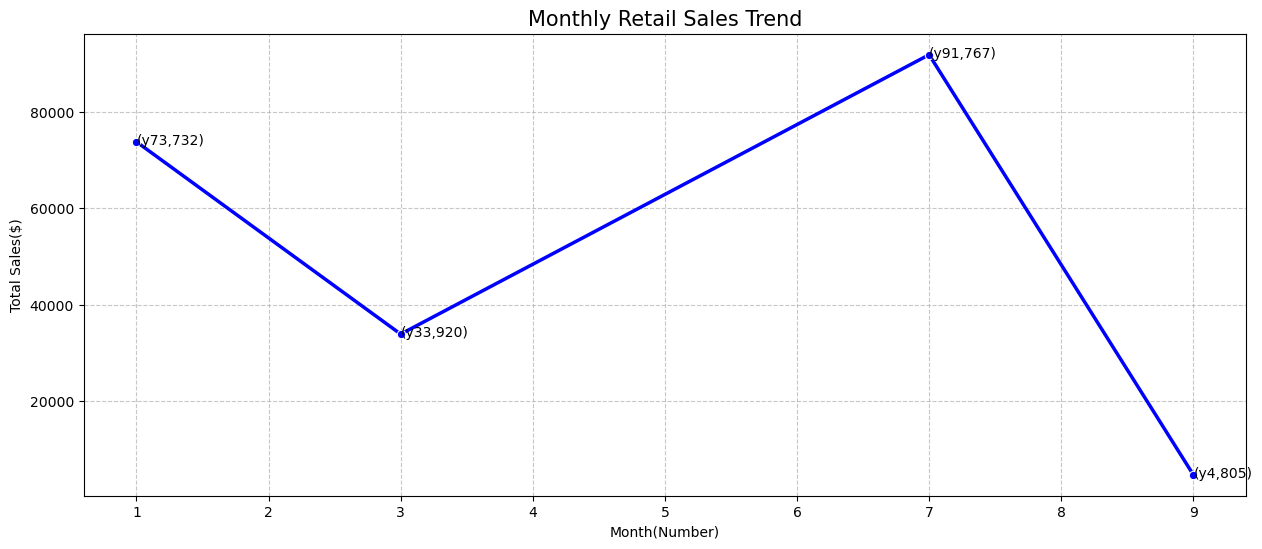

In [12]:
# line chart

# for seting the size of the chart 
plt.figure(figsize=(15,6))

#create the line chart 
sns.lineplot(x='MONTH',y='RETAIL SALES',data=monthly_sales,marker='o',color='b',linewidth=2.5)

# Adding the labeles and title
plt.title('Monthly Retail Sales Trend',fontsize=15)
plt.xlabel('Month(Number)',fontsize=10)
plt.ylabel('Total Sales($)',fontsize=10)

#Adding a grid to read the value easier
plt.grid(True,linestyle="--",alpha=0.7)

#Adding lables to each point 
for x,y in zip(monthly_sales["MONTH"],monthly_sales['RETAIL SALES']):
    plt.text(x,y-500,f'(y{y:,.0f})',color="black",ha='left',fontweight="normal")

#show the plot 
plt.show()




# INVENTORY VS RETAIL SALES COMPARISION

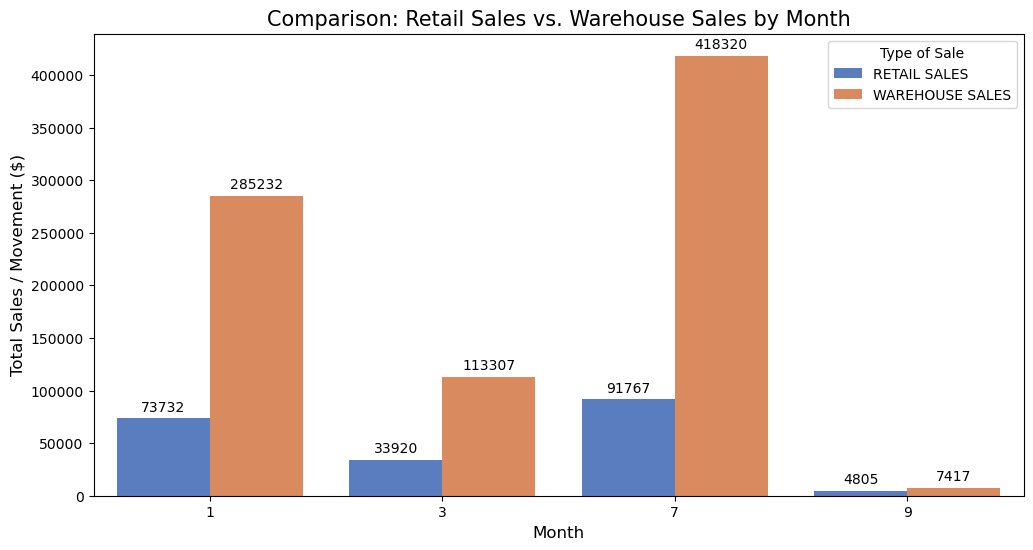

In [13]:
# 1.  (grouping both Retail and Warehouse sales by Month)
comparison_data = df_clean.groupby('MONTH')[['RETAIL SALES', 'WAREHOUSE SALES']].sum().reset_index()

# we can plot two bars side-by-side using seaborn but we need to 'melt' data
comparison_melted = comparison_data.melt(id_vars='MONTH', var_name='Sales Type', value_name='Amount')

# 3. Create the Grouped Bar Chart
plt.figure(figsize=(12, 6))
grouped_bar = sns.barplot(x='MONTH', y='Amount', hue='Sales Type', data=comparison_melted, palette='muted')

# 4. Adding Labels on top of the bars
for container in grouped_bar.containers:
    grouped_bar.bar_label(container, fmt='%.0f', padding=3)

# 5. Adding titles
plt.title('Comparison: Retail Sales vs. Warehouse Sales by Month', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales / Movement ($)', fontsize=12)
plt.legend(title='Type of Sale')
plt.show()

# CORRELATION ANALYSIS

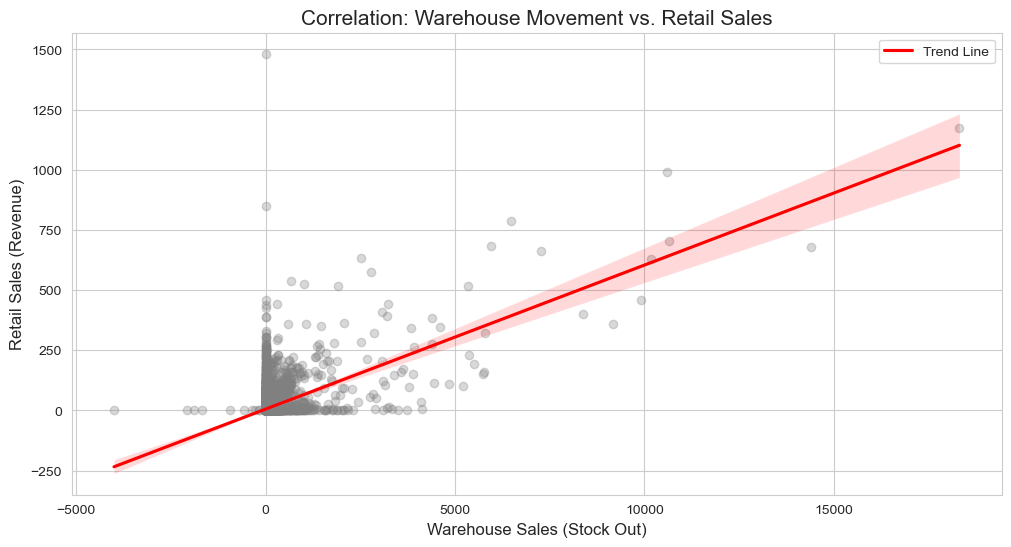

The Correlation Coefficient is: 0.57


In [14]:
# 1. Set the style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# 2. Createing a Scatter Plot 
sns.regplot(x='WAREHOUSE SALES', y='RETAIL SALES', data=df_clean, 
            scatter_kws={'alpha':0.3, 'color':'gray'}, 
            line_kws={'color':'red', 'label':'Trend Line'})    # This help to see relationship between warehouse & retail sales.

# 3. Adding titles 
plt.title('Correlation: Warehouse Movement vs. Retail Sales', fontsize=15)
plt.xlabel('Warehouse Sales (Stock Out)', fontsize=12)
plt.ylabel('Retail Sales (Revenue)', fontsize=12)
plt.legend()

plt.show()

# 4. Calculate the Correlation Coefficient (The "Math" proof)
correlation = df_clean['WAREHOUSE SALES'].corr(df_clean['RETAIL SALES'])
print(f"The Correlation Coefficient is: {correlation:.2f}")

# MARKET SHARE DISTRIBUTION

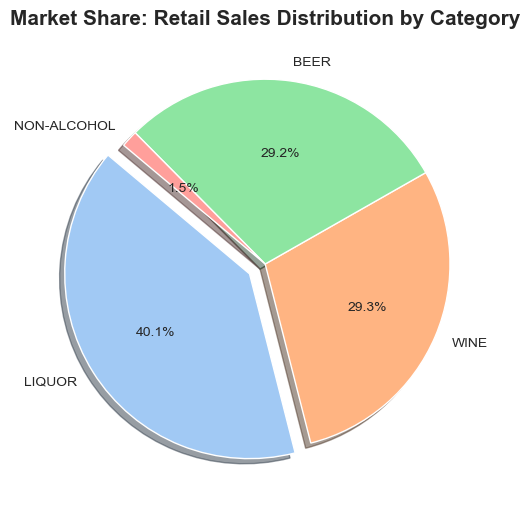

In [15]:
# ( For clean look we will use top 4 categories)
pie_data = item_sales.head(4)

#  Create the Pie Chart
plt.figure(figsize=(10, 6))
colors = sns.color_palette('pastel')[0:4]

plt.pie(pie_data['RETAIL SALES'], 
        labels=pie_data['ITEM TYPE'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors,
        explode=(0.1, 0, 0, 0), # This "pops out" the biggest slice (Liquor)
        shadow=True)

# 3. Adding title
plt.title('Market Share: Retail Sales Distribution by Category', fontsize=15, fontweight='bold')

plt.show()

# PROJECT SUMMARY - "Retail Sales Performance & Seasonality Analysis using Python"

1.Overview of the Project

The goal of this project was to look at how retail sales change over time and which products are driving the most business. I used Python (Pandas, Matplotlib, and Seaborn) to clean the data and create charts that show trends and product performance.

2. Data Cleaning
Before starting the analysis, I checked the data for errors. I found a few missing values in the 'Supplier' and 'Retail Transfer' columns, so I removed those rows to make sure the final numbers were accurate. The final dataset I used had 29,967 rows.

3. Key Findings from the Charts
​Best Sales Month: My line chart shows that July (Month 7) is the busiest time for the business, with over $91,000 in sales. Sales drop off a lot in September.
​Top Products: Liquor is the biggest seller, followed by Wine and Beer. Liquor alone brought in about $81,743.
​Retail vs. Warehouse: By comparing the two, I noticed that warehouse movement is much higher than retail sales, especially in July. This shows the business moves a lot of stock to prepare for customer demand.
​Sales Relationship: I used a scatter plot to see if warehouse stock affects sales. The correlation of 0.57 proves that as more stock moves through the warehouse, retail sales generally go up.


5. My Conclusion -
Based on the data, the business is very seasonal, with a huge peak in the summer. Since Liquor and Wine are the main profit makers, we should make sure the warehouse is fully stocked before July to avoid losing out on potential sales.